In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf

In [ ]:
!wget https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv

## Data Exploration

In [40]:
# Read data from csv file into a dataframe

df_train = pd.read_csv('train.csv')
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df_train.shape

(1460, 81)

In [7]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

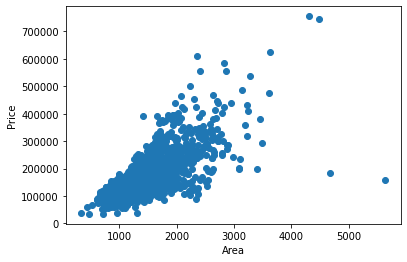

In [9]:
%matplotlib inline

plt.scatter(df_train['GrLivArea'],df_train['SalePrice'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

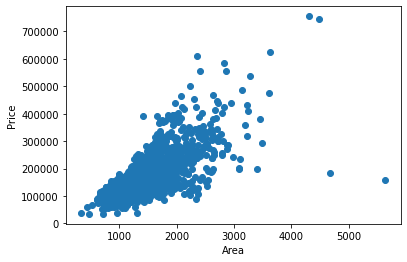

In [10]:
plt.scatter(df_train['GrLivArea'],df_train['SalePrice'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

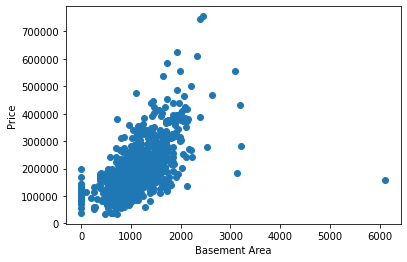

In [11]:
plt.scatter(df_train['TotalBsmtSF'],df_train['SalePrice'])
plt.xlabel('Basement Area')
plt.ylabel('Price')
plt.show()

<AxesSubplot:>

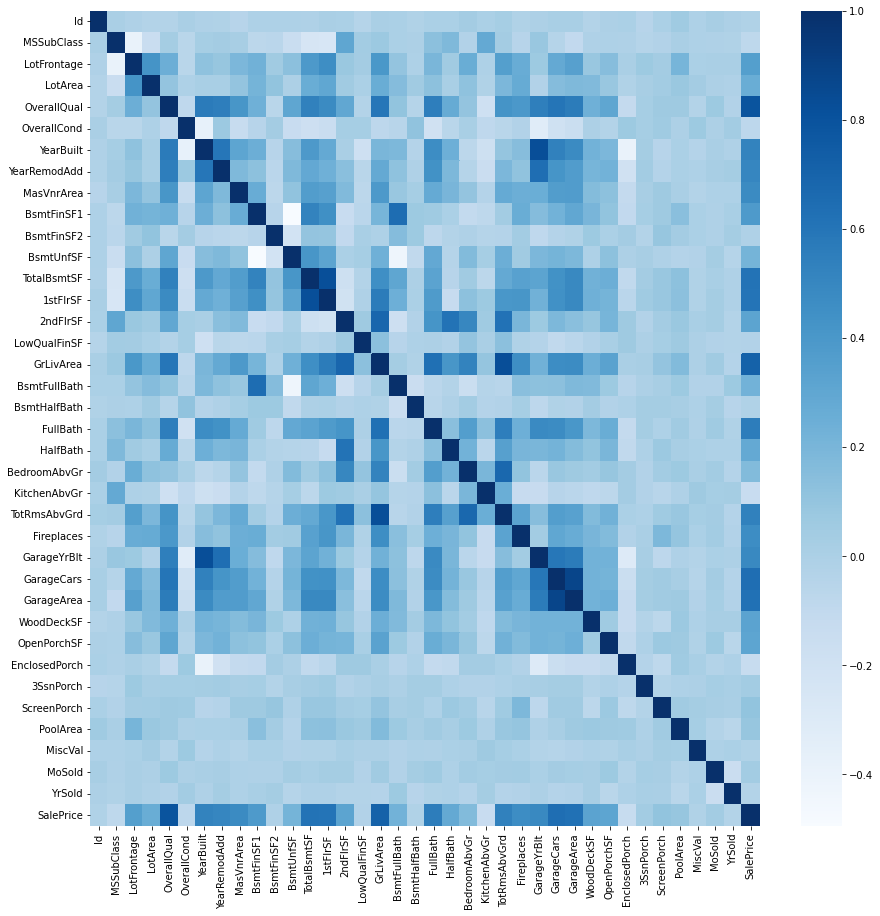

In [12]:
cm = df_train.corr()
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cm,cmap="Blues")

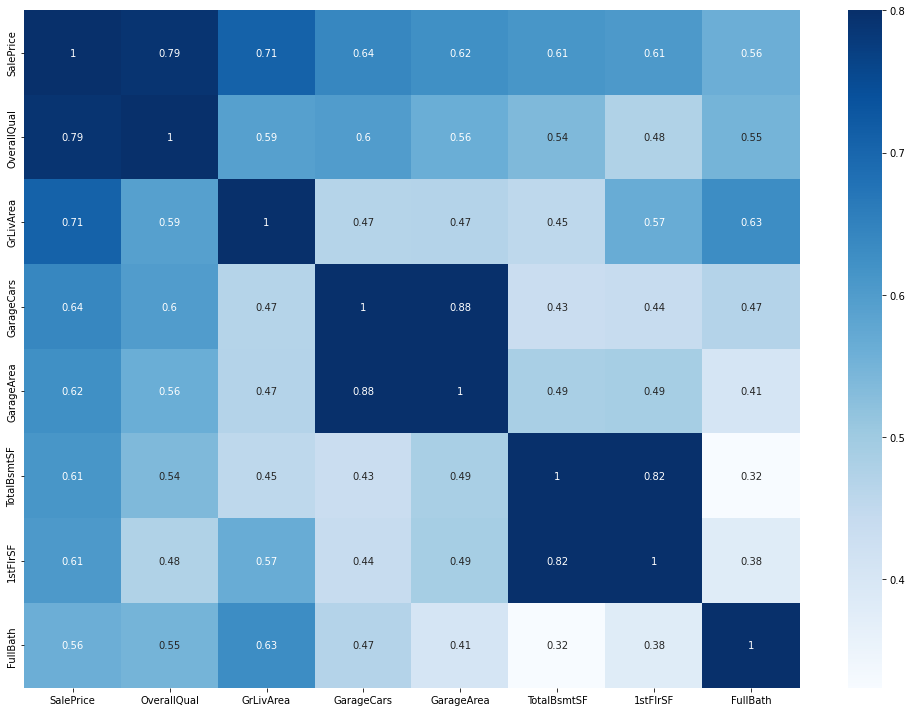

In [13]:
n = 8 
col = cm.nlargest(n, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(14,10))
sns.heatmap(df_train[col].corr(), vmax=0.8, cmap="Blues",annot=True)
plt.tight_layout()

##### From above heatmap we can see that only certain features are affecting the target variable 'SalePrice'.
##### We will now extract feature list with which gives the percentage with which these vallues are affecting 'SalePrice' 

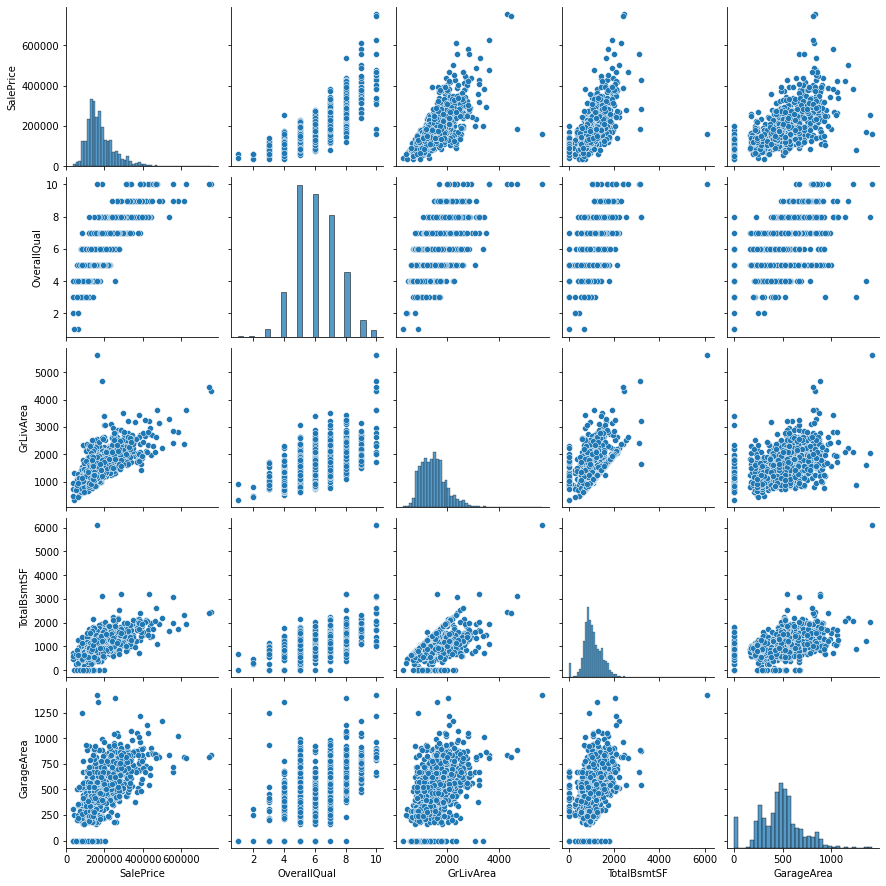

In [14]:
columns = ['SalePrice','OverallQual','GrLivArea','TotalBsmtSF','GarageArea']
sns.pairplot(df_train[columns])

In [73]:

feature_list = abs(cm.iloc[:-1,-1]).sort_values()
feature_list

BsmtFinSF2       0.011378
BsmtHalfBath     0.016844
MiscVal          0.021190
Id               0.021917
LowQualFinSF     0.025606
YrSold           0.028923
3SsnPorch        0.044584
MoSold           0.046432
OverallCond      0.077856
MSSubClass       0.084284
PoolArea         0.092404
ScreenPorch      0.111447
EnclosedPorch    0.128578
KitchenAbvGr     0.135907
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
Name: SalePrice, dtype: float64

Text(0, 0.5, 'variable')

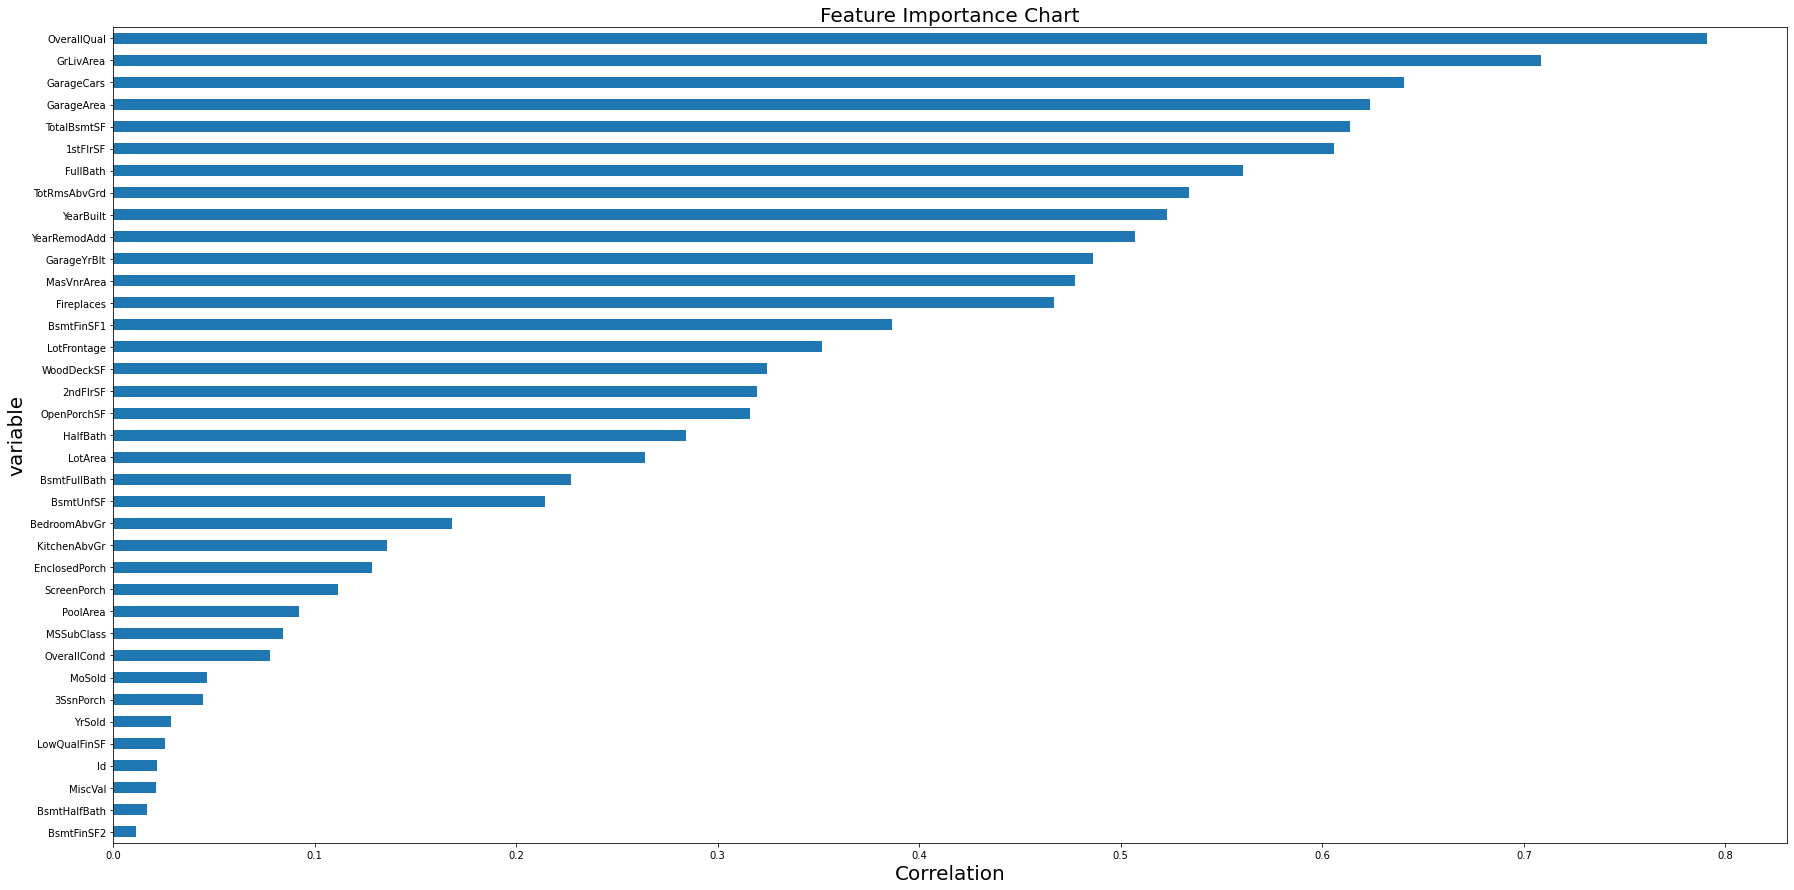

In [74]:
feature_list.plot(kind='barh', figsize=(30,15))
plt.title('Feature Importance Chart',fontsize=20)
plt.xlabel('Correlation', fontsize=20)
plt.ylabel('variable', fontsize=20)

#### Data Analysis Concclusions:
##### From above analysis we can see that 'TotalBsmtSF','OverallQual', 'GrLivArea', 'GarageCars','1stFlrSF' are the most imporant features in relation with target feature 'SalePrice'.
##### We will be using only these features to create our model as our target variable is most affected by these.

In [78]:
# checking for missing data
count = df_train[['TotalBsmtSF','OverallQual', 'GrLivArea', 'GarageCars','1stFlrSF']].isnull().sum().sort_values(ascending=False)
missing_data = pd.DataFrame(count, columns=['count'])
missing_data = missing_data[missing_data['count']>0]
missing_data

,count


#### There are no null values in the requuired data column. Now we will use Sklearn to create train test split and data preprocessing

In [49]:
#SalePrice is target column so we will be dropping it from training input and store it in y variable
X = df_train[['TotalBsmtSF','OverallQual', 'GrLivArea', 'GarageCars','1stFlrSF']]
y = df_train['SalePrice']

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [58]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1314, 5) (1314, 1) (146, 5) (146, 1)


In [52]:
y_train =y_train.to_numpy()
y_test = y_test.to_numpy()

In [53]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

y_train_scaled = sc.fit_transform(y_train)
y_test_scaled = sc.transform(y_test)

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
Reg = LinearRegression()
Reg.fit(X_train,y_train)

LinearRegression()

In [62]:
y_pred = Reg.predict(X_train)

In [63]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_pred, y_train))
mpe  = np.mean((y_train - y_pred)/y_train*100)
mape = np.mean(abs(y_train - y_pred)/y_train*100)
me = np.mean((y_train - y_pred))

In [64]:
print('RMSE = {}'.format(rmse))
print('MPE = {}'.format(mpe))
print('MAPE = {}'.format(mape))
print('ME = {}'.format(me))

RMSE = 38184.104913434974
MPE = -2.4650527843343113
MAPE = 15.329146731725563
ME = -3.012268601305771e-11


In [65]:
from sklearn.model_selection import cross_val_score
#print(f'The mean cross validation score for this model is {round(cross_val_score(Reg, X_train, y_train).mean(),4)}.')
print(f'The training score for this model is {round(Reg.score(X_train, y_train), 4)}.')


The training score for this model is 0.7567.


In [66]:
y_pred1 = Reg.predict(X_test)

In [67]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_pred1, y_test))
mpe  = np.mean((y_test - y_pred1)/y_test*100)
mape = np.mean(abs(y_test - y_pred1)/y_test*100)
me = np.mean((y_test - y_pred1))

In [68]:
print('RMSE = {}'.format(rmse))
print('MPE = {}'.format(mpe))
print('MAPE = {}'.format(mape))
print('ME = {}'.format(me))

RMSE = 44057.1431573563
MPE = 1.2943604925811998
MAPE = 15.44746875288406
ME = 6289.177629354762


In [69]:
print(f'The testing score for this model is {round(Reg.score(X_test, y_test), 4)}.')

The testing score for this model is 0.7876.


In [70]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred1)

0.7875551729129955

Test data score of this regression model is 0.78 which still has scope of improvement. With more feature extraction and transformation this score can further be improved.